## MITx 6.419x - Data Analysis: Statistical Modeling and Computation in Applications

# Module 3 - Networks analysis

In [730]:
# loading modules

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline



# Network packages

import networkx as nx
import pygraphviz

# Ignoring warning messages

import warnings
warnings.filterwarnings('ignore')

In [731]:
# Function to save figures

IMAGES_PATH = '../images'
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Investigating a time-varying criminal network

In this problem, you will study a time-varying criminal network that is repeatedly disturbed by police forces. The data for this problem can be found in the CAVIAR directory of the data archive or downloaded online.

The CAVIAR investigation lasted two years and ran from 1994 to 1996. The opration brought together investigation units of the Montréal police and the Royal Canadian Mounted Police of Canada. During this two year period, 11 wiretap warrants, valid for a period of about two months each, were obtained.

This case is interesting because, unlike other investigative strategies, the mandate of the CAVIAR project was to seize the drugs without arresting the perceptrators. During this period, imports of the trafficking network were hit by the police on eleven occasions. The arrests took place only at the end of the investigation. Monetary losses for traffickers were estimated at 32 million dollars. Eleven seizures took place throughout the investigation. Some phases included no seizures, and other included multiple. The following summarizes the 11 seizures:

        Phase 4    1 seizure    $2,500,000    300 kg of marijuana
        
        Phase 6    3 seizures   $1,300,000    2 x 15 kg of marijuana + 1 x 2 kg of cocaine
        
        Phase 7    1 seizure    $3,500,000    401 kg of marijuana
        
        Phase 8    1 seizure    $360,000      9 kg of cocaine
        
        Phase 9    2 seizures   $4,300,000    2 kg of cocaine + 1 x 500 kg marijuana
        
        Phase 10   1 seizure    $18,700,000   2200 kg of marijuana
        
        Phase 11   2 seizures   $1,300,000    12 kg of cocaine + 11 kg of cocaine

This case offers a rare opportunity to study a criminal network in upheaval from police forces. This allows us to analyze changes in the network structure and to survey the reaction and adaptation of the participants while they were subjected to an increasing number of distressing constraints.

The network consists of 110 (numbered) players. Players 1-82 are the traffickers. Players 83-110 are the non-traffickers (financial investors; accountants; owners of various importation businesses, etc.). Initially, the investigation targeted Daniel Serero, the alleged mastermind of a drug network in downtown Montréal, who attempted to import marijuana to Canada from Morocco, transiting through Spain. After the first seizure, happening in Phase 4, traffickers reoriented to cocaine import from Colombia, transiting through the United States.

According to the police, the role of 23 of the players in the "Serero organization" are the following, listed by name (unique id):

    - Daniel Serero (n1): Mastermind of the network.
    
    - Pierre Perlini (n3): Principal lieutenant of Serero, he executes Serero's instructions.
    
    - Alain (n83) and Gérard (n86) Levy: Investors and transporters of money.
    
    - Wallace Lee (n85): Takes care of financial affairs (accountant).
    
    - Gaspard Lino (n6): Broker in Spain.
    
    - Samir Rabbat (n11): Provider in Morocco.
    
    - Lee Gilbert (n88): Truested man of Wallace Lee (became an informer after the arrest).
    
    - Beverly Ashton (n106): Spouse of Lino, transports money and documents.
    
    -  Antonio Lannacci (n89): Investor.
    
    - Mohammed Echouafni (n84): Moroccan investor.
    
    - Richard Gleeson (n5) Bruno de Quinzio (n8) and Gabrielle Casale (n76): Charged with recuperating the marijuana.
    
    - Roderik Janouska (n77): Individual with airport contacts.
    
    - Patrick Lee (n87): Investor.
    
    - Salvatore Panetta (n82): Transport arrangemenets manager.
    
    - Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest).
    
    - Ernesto Morales (n12): Principal organizer of the cocaine import, intermediary between the Columbians and the Serero organization.
    
    - Oscar Nieri (n17): The handyman of Morales.
    
    - Richard Brebner (n80): Was transporting the cocaine from the US to Montréal.
    
    - Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner.
    
    - Johny Pacheco (n16): Cocaine provider.

In the data files, you will find matries that report the number of wiretapped correspondences between the above players in the network, where players are identified by their unique id. You will be analyzing this time-varying network, giving a rough sketch of its shape, its evolution and the role of the actors in it.

<b> What is the size of the network at each phase? </b>

In [732]:
# Downloading and preparing data 

phases = {}
G = {}
G_summaries = {'Nodes': [], 'Edges': []}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  G_summaries['Nodes'].append(G[i].number_of_nodes())
  G_summaries['Edges'].append(G[i].number_of_edges())

In [733]:
G_pdf = pd.DataFrame(G_summaries, range(1, 12))
G_pdf

,Nodes,Edges
1,15,18
2,24,28
3,33,56
4,33,48
5,32,39
6,27,47
7,36,49
8,42,58
9,34,44
10,42,50


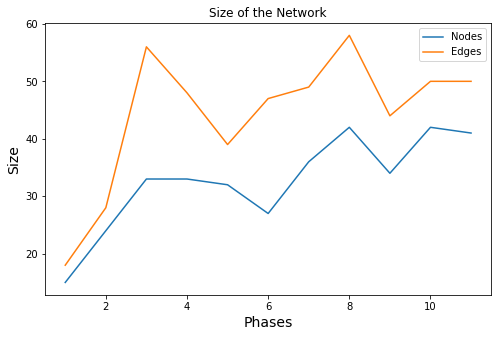

In [734]:
# Plotting size of the network at each different phase

plt.figure(figsize=(8,5))
plt.title('Size of the Network')
plt.plot(range(1,12), [ G[i].number_of_nodes() for i in range(1,12) ], label="Nodes")
plt.plot(range(1,12), [ G[i].number_of_edges() for i in range(1,12) ], label="Edges")
plt.xlabel('Phases', fontsize=14)
plt.ylabel('Size', fontsize=14)
plt.legend()
plt.show()

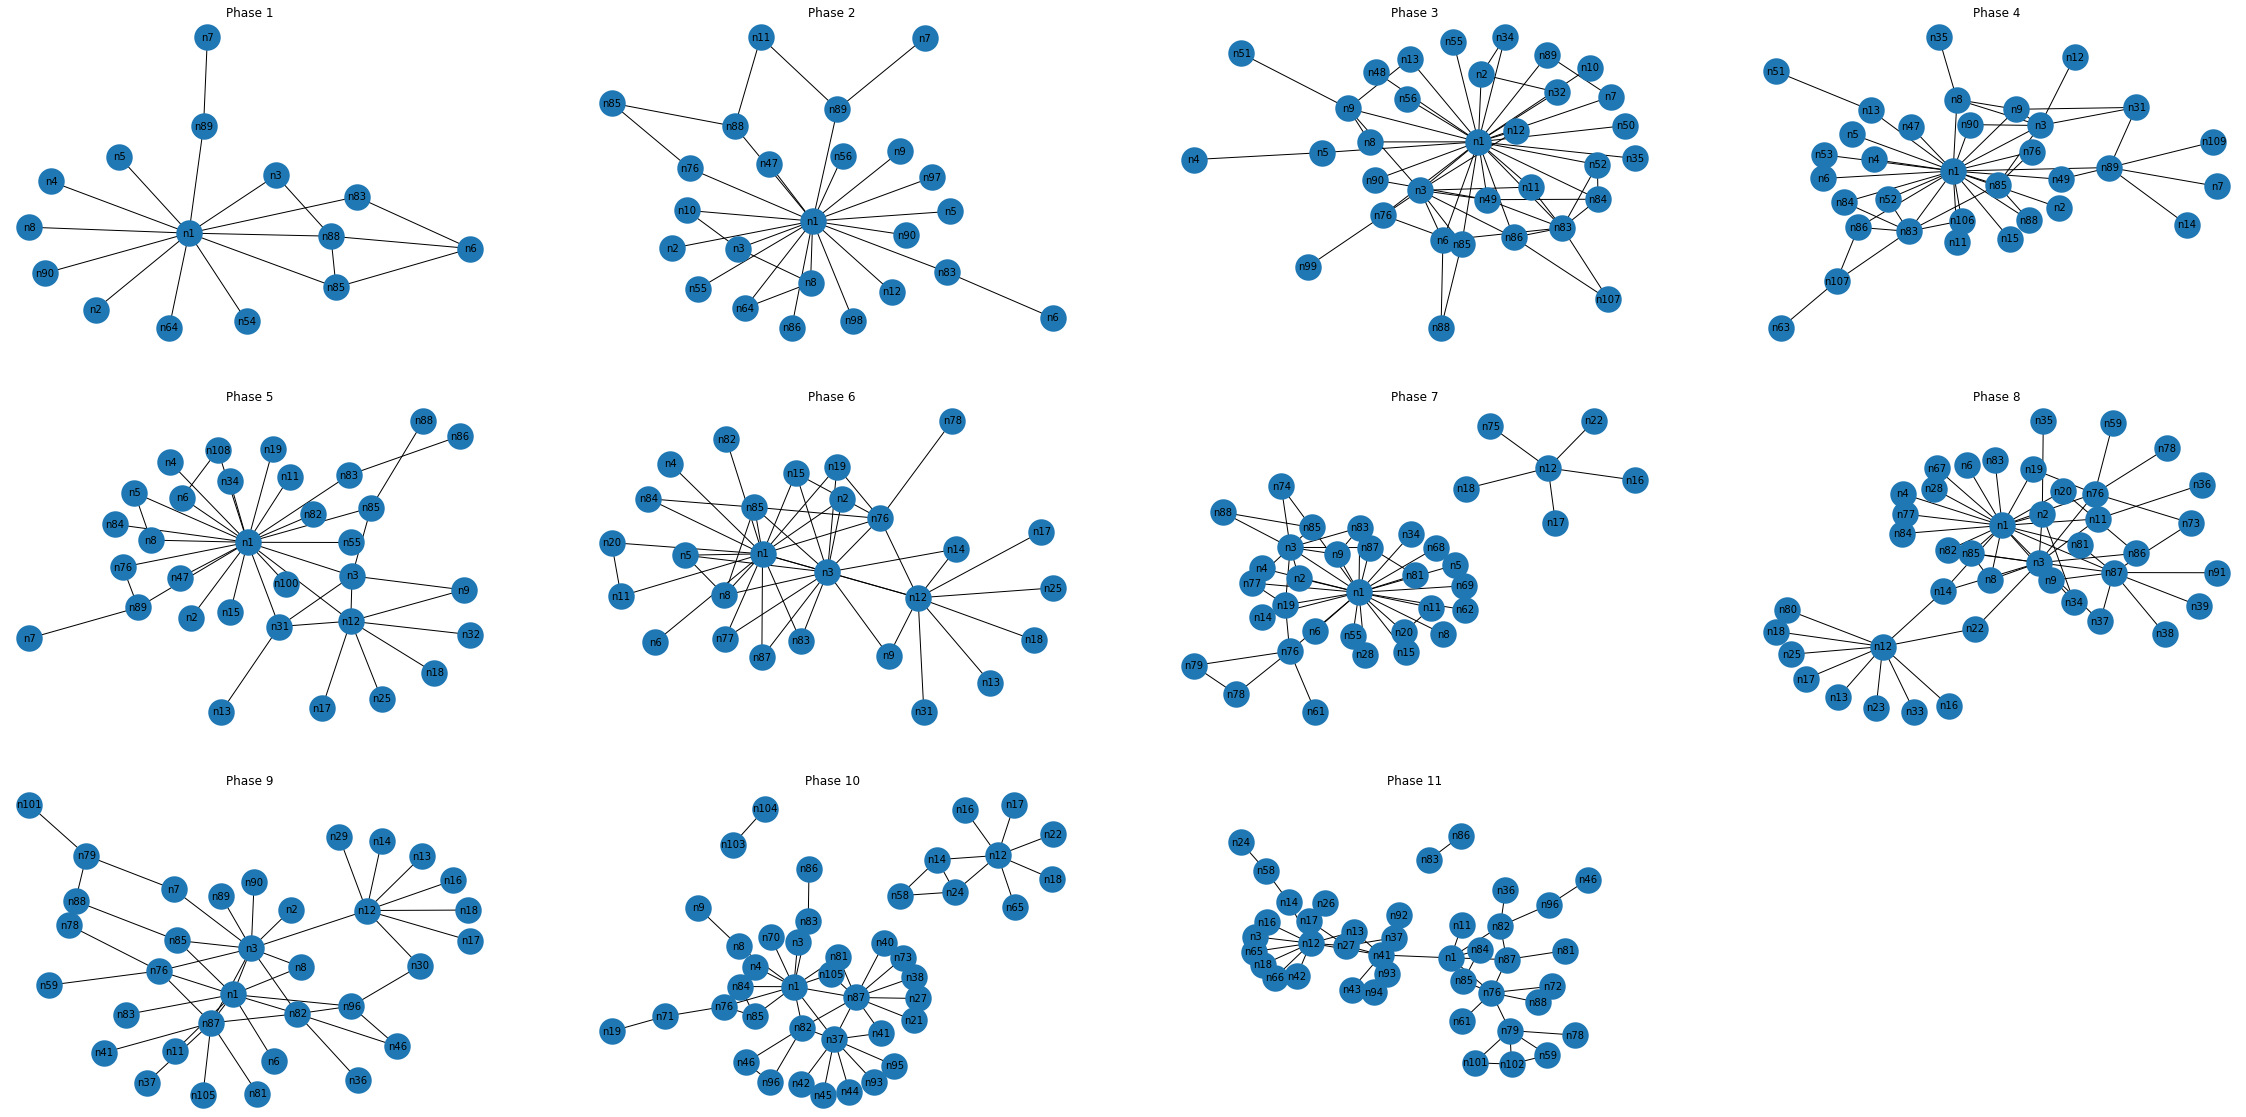

In [735]:
# Plotting all phases

options = {
    "font_size": 10,
    "node_size": 550,
    "linewidths": 3}

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))
ax = axes.flatten()
for i, sub_ax in zip(range(1,12), ax):
  nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), **options, with_labels=True, ax = sub_ax)
  sub_ax.set_axis_off()
  sub_ax.set_title('Phase {}'.format(i))
ax[10].margins(0.20)
fig.delaxes(ax[11])

<b> Visualize the graph of Phase 3. How does it look like? </b>

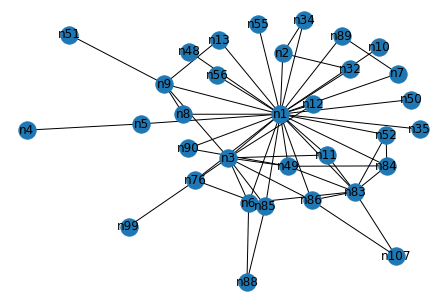

In [736]:
# Visualizing graph of Phase 3 with networkx package

nx.draw(G[3], pos=nx.drawing.nx_agraph.graphviz_layout(G[3]), with_labels=True)
#save_fig('graph_3')

<b> For each of the 11 phases and for each of the players under investigation, compute and list the normalized degree centrality of the player. </b>

The normalized degree centrality of node $i$ is defined as

$$\displaystyle  \tilde{k}_ i\displaystyle = \frac{k_ i}{n-1},$$,

where $k_ i$ is the degree of noe $i$ and $n$ is the number of nodes in the graph.

In [737]:
# Computing normalized degree centrality

deg = { i: nx.degree_centrality(G[i]) for i in range(1,12) }
deg_df = pd.DataFrame.from_dict(deg, orient='index')
pd.set_option('max_columns', None)
deg_df

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,n109,n31,n14,n106,n15,n108,n100,n18,n17,n25,n82,n19,n78,n77,n87,n20,n62,n22,n74,n79,n69,n61,n68,n16,n75,n28,n81,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
1,0.857143,0.071429,0.142857,0.142857,0.142857,0.071429,0.285714,0.214286,0.071429,0.071429,0.071429,0.071429,0.214286,0.071429,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.826087,NaN,0.130435,0.086957,0.130435,0.043478,0.130435,0.086957,0.043478,0.043478,0.043478,NaN,0.043478,0.086957,0.130435,0.043478,0.043478,0.086957,0.043478,0.043478,0.043478,0.043478,0.086957,0.043478,0.086957,0.043478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.843750,0.031250,0.062500,0.250000,0.281250,0.062500,0.062500,0.125000,0.062500,0.093750,0.062500,NaN,0.125000,NaN,0.062500,0.125000,0.031250,0.031250,0.031250,NaN,NaN,NaN,0.062500,0.156250,0.093750,0.062500,0.03125,0.062500,0.03125,0.062500,0.125000,0.15625,0.06250,0.03125,0.03125,0.062500,0.03125,0.09375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.718750,0.031250,0.187500,0.218750,0.218750,0.031250,0.062500,0.156250,0.062500,0.031250,0.031250,NaN,0.031250,NaN,0.125000,0.093750,NaN,NaN,NaN,NaN,0.031250,NaN,0.062500,0.125000,0.031250,0.031250,NaN,NaN,0.03125,NaN,0.062500,0.06250,0.09375,NaN,NaN,0.062500,0.03125,0.06250,0.03125,0.03125,0.03125,0.093750,0.031250,0.0625,0.031250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.709677,0.032258,0.096774,0.064516,0.161290,0.064516,0.032258,0.096774,NaN,0.032258,0.032258,NaN,0.064516,NaN,0.064516,0.032258,0.032258,NaN,NaN,NaN,0.032258,NaN,0.064516,0.064516,0.032258,0.258065,NaN,0.032258,NaN,0.032258,0.032258,NaN,NaN,NaN,NaN,0.032258,NaN,NaN,NaN,NaN,NaN,0.129032,NaN,NaN,0.032258,0.064516,0.032258,0.032258,0.032258,0.032258,0.032258,0.032258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.692308,0.038462,NaN,0.076923,0.538462,0.115385,NaN,0.192308,NaN,0.076923,NaN,NaN,0.038462,NaN,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269231,0.076923,0.076923,0.384615,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,0.038462,NaN,NaN,NaN,NaN,NaN,0.038462,0.076923,NaN,0.115385,NaN,NaN,0.038462,0.038462,0.038462,0.038462,0.115385,0.038462,0.076923,0.076923,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.685714,0.028571,NaN,0.085714,0.285714,0.028571,0.057143,0.114286,NaN,0.057143,NaN,NaN,0.028571,NaN,0.028571,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,0.142857,0.085714,0.057143,0.142857,NaN,0.0

<b> For each of the 11 phases and for each of the players under investigation, compute and list the normalized betweenness centrality of the players.</b>

For undirected graphs, the normalized betweenness centrality for node $i$ is defined as

$$\displaystyle  \tilde{B}_ i = \frac{2}{(n-1)(n-2)} \sum _{s\neq i\neq t} \frac{n^ i_{st}}{g_{st}},$$

where $n^ i_{st}$ is the number of shortest paths between $s$ and $t$ that pass through $i$ and $g_{st}$ is the total number of shortest paths between $s$ and $t$. Note that this considers both orderings of each pair of nodes, so for undirected graphs, a path counts twice (as it counts both for $n^ i_{st}$ and for $n^ i_{ts}$).

In [738]:
# Computing normalized betweenness centrality

bet = { i: nx.betweenness_centrality(G[i],normalized = True) for i in range(1,12) }
bet_df = pd.DataFrame.from_dict(bet, orient='index')
bet_df

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,n109,n31,n14,n106,n15,n108,n100,n18,n17,n25,n82,n19,n78,n77,n87,n20,n62,n22,n74,n79,n69,n61,n68,n16,n75,n28,n81,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
1,0.906593,0.0,0.142857,0.036630,0.000000,0.0000,0.053114,0.036630,0.0,0.000000,0.000000,0.0,0.010989,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.942688,NaN,0.123847,0.086957,0.001976,0.0000,0.083004,0.003294,0.0,0.000000,0.000000,NaN,0.000000,0.0,0.001976,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.038208,0.000000,0.006588,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.829503,0.0,0.000000,0.046573,0.095497,0.0625,0.000672,0.029973,0.0,0.001008,0.000000,NaN,0.033333,NaN,0.000000,0.028024,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.067540,0.000806,0.000000,0.0,0.0,0.0,0.0,0.000672,0.007527,0.0000,0.0,0.0,0.0000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.839310,0.0,0.196213,0.079589,0.090438,0.0000,0.000000,0.016537,0.0,0.000000,0.000000,NaN,0.000000,NaN,0.062500,0.047427,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.014761,0.000000,0.000000,NaN,NaN,0.0,NaN,0.000000,0.000000,0.0625,NaN,NaN,0.0625,0.0,0.0,0.0,0.0,0.0,0.012097,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.883871,0.0,0.064516,0.064516,0.044086,0.0000,0.000000,0.064516,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.269892,NaN,0.0,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.064516,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.542564,0.0,NaN,0.000000,0.227179,0.0000,NaN,0.010256,NaN,0.000000,NaN,NaN,0.000000,NaN,0.001026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098462,0.000000,0.000000,0.382051,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.589356,0.0,NaN,0.000000,0.073389,0.0000,0.000000,0.031653,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.134454,0.000000,0.000000,0.016807,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.011204,0.000000,0.0,0.001961,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

<b> For each of the 11 phases and for each of the players under investigation, compute and list the eigenvector centrality of the player.</b>

Ensure your eigenvector  centrality is normalized as

$$\sqrt{\sum _ i v_ i^2} = 1.$$

In [739]:
# Computing normalized eigenvector centrality

eig = { i: nx.eigenvector_centrality(G[i]) for i in range(1,12) }
eig_df = pd.DataFrame.from_dict(eig, orient='index')
eig_df

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,n109,n31,n14,n106,n15,n108,n100,n18,n17,n25,n82,n19,n78,n77,n87,n20,n62,n22,n74,n79,n69,n61,n68,n16,n75,n28,n81,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
1,0.626451,0.160482,0.171753,2.193098e-01,0.253842,0.160482,0.364437,0.312670,0.160482,0.160482,0.043999,0.160482,0.229640,0.160482,0.160482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.673912,NaN,0.169109,1.522634e-01,0.239088,0.145195,0.176940,0.072783,0.145195,0.145195,0.036434,NaN,0.032805,0.196707,0.239088,1.451954e-01,0.145195,0.196707,0.145195,0.145195,0.145195,0.145195,0.160877,0.145195,0.074556,1.451954e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.593879,0.014355,0.107798,2.774973e-01,0.291305,0.093443,0.053605,0.162067,0.126237,0.125180,0.107798,NaN,0.186857,NaN,0.118356,1.896475e-01,0.091238,0.091238,0.091238,NaN,NaN,NaN,0.116136,0.176523,0.178622,1.359905e-01,0.091238,0.110469,0.091238,0.110469,0.194014,0.227822,0.071767,0.091238,0.044753,0.118356,0.027119,0.163675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.610379,0.105740,0.162857,2.710145e-01,0.272630,0.105740,0.149337,0.251661,0.152970,0.105740,0.028213,NaN,0.105740,NaN,0.194477,1.662173e-01,NaN,NaN,NaN,NaN,0.105740,NaN,0.149337,0.205910,0.105740,4.722976e-02,NaN,NaN,0.033691,NaN,0.152690,0.133953,0.078088,NaN,NaN,0.109011,0.018885,0.152690,0.10574,0.013528,0.028213,0.111114,0.028213,0.15269,0.105740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.640199,0.122096,0.156787,1.267042e-01,0.275675,0.150869,0.034570,0.181265,NaN,0.122096,0.029902,NaN,0.150869,NaN,0.150869,2.416467e-02,0.122096,NaN,NaN,NaN,0.122096,NaN,0.151997,0.106162,0.122096,2.809734e-01,NaN,0.122096,NaN,0.053586,0.122096,NaN,NaN,NaN,NaN,0.045176,NaN,NaN,NaN,NaN,NaN,0.236874,NaN,NaN,0.122096,0.150869,0.122096,5.358644e-02,5.358644e-02,0.053586,0.122096,0.122096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.496656,0.077633,NaN,1.487375e-01,0.454884,0.182481,NaN,0.247009,NaN,0.148738,NaN,NaN,0.077633,NaN,0.215873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.296568,0.112085,0.092017,2.621669e-01,NaN,NaN,NaN,NaN,0.116244,NaN,NaN,NaN,NaN,0.040981,NaN,NaN,NaN,NaN,NaN,0.040981,0.112085,NaN,0.195095,NaN,NaN,4.098101e-02,4.098101e-02,0.040981,0.077633,0.195095,0.046358,0.148738,0.148738,0.092017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.601987,0.102625,NaN,2.002621e-01,0.372468,0.102625,0.097483,0.199359,NaN,0.166122,NaN,NaN,0.

<b> Recall the mathematical definition of each of these metrics, along with the algorithm that is best suited to compute it and the corresponding time complexity. Which algorithm is the fastest for this data set?</b>

In [740]:
%timeit -n 10 deg = { i: nx.degree_centrality(G[i]) for i in range(1,12) }
%timeit -n 10 bet = { i: nx.betweenness_centrality(G[i],normalized = True) for i in range(1,12) }
%timeit -n 10 eig = { i: nx.eigenvector_centrality(G[i]) for i in range(1,12) }

152 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
36.7 ms ± 3.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
25.2 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Running 10 loops of each, we can see that the normalized degree centrality is the fastest to compute.  In the Big O notation its complexity is O(n^2) while the other two have O(n^3).

<b> For the betweenness and eigenvector centrality, which three players have the highest mean?</b>

To answer this question, look at the temporal evolution of the networks and calculate the mean centrality for each of the centrality metrics, across all phases, for every player. Note: As every actor might not be present in every phase, attach a centrality of zero to an actor for the phases in which they are not present, before calculating these statistics, so that you take a mean over all 11 phases for all actors.

In [741]:
# Calculating highest means for betweenness centrality

np.mean(bet_df.fillna(0), axis=0).sort_values(ascending=False)[:3]

n1     0.655051
n12    0.167562
n3     0.129403
dtype: float64

In [742]:
# Calculating highest means for eigenvector centrality

np.mean(eig_df.fillna(0), axis=0).sort_values(ascending=False)[:3]

n1     0.546391
n3     0.298095
n85    0.190612
dtype: float64

<b> Observe the plot you made in the beginning. The number of nodes increases sharply over the first few phases then levels out. Comment on what you think may be causing this effect. Based on your answer, should you adjust your conculusions in the previous questions?</b>

The investigation took place over 11 phases where the drug seizures happened in phases 4, 6 and after that from 7 to 11. The members of the network thus got first contact with the law enforcement through the seizure of 300 kg of marijuana in phase 4. The network expanded and more members joined until this seizure and after that, they probably became more prudent and cautious in their dealings afterwards. The police were also likely using the wiretaps to grow the list of suspects during the early phases and perhaps some of the players hadn't been on the list yet so this could bias their mean score downward even though they were active in the network. For this reason the early phases should be removed from the calculation.

<b> In the context of criminal networks, what would each of these metrics teach you about the importance of an actor's role in the traffic? In your own words, could you explain the limitations of degree centrality? In your opinion, which one would be most relevant to identify who is running the illegal activities of the group?</b>

In graph theory and network analysis, indicators of centrality identify the most important nodes within a graph. The classification between the nodes can be analyzed how the measure of centrality is constructed. The connections between the nodes are counted through walks of length one (i.e. degree centrality) or infinite number of walks (i.e. eigenvalue centrality). Both these radial centralities count walks which start and end from a given node, whereas in medial centralities, such as in the betweenness centrality, walks arecounted through a given node by measuring the extent to which a node lies on paths between other nodes. It thus manages to also capture the ‘cascade effects’ of having connections to important nodes that are themselves well-connected, which the degree and eigenvector centrality measures don’t manage to capture.

Having a higher value of degree and eigenvector centrality means a person is well connected and a popular person in the network, whereas having a high betweenness centrality means a person whose removal could best break the network apart. When
analyzing criminal networks you could presume that betweenness centrality measures the importance better as those people high in the hierarchy delegate as much as possible people down the line in order to decrease the risk of getting caught and it matters more who you are connected with than than the total number of connections you have.

When comparing the two centrality measures on betweenness and eigenvectors we can see that the importance of Ernesto Morales in the network was better captured in the betweenness centrality measure where apart from him and Daniel Serero - the number 1 - the top 3 list also included Pierre Perlini, the principal lieutenant of Serero. By measuring the centrality with eigenvectors however the list changed so that apart from Daniel Serero and Pierre Perlini, the third member on the list was Wallace Lee, number 85 and accountant of the network. Thus when measuring with eigenvectors, the change of the network dynamic after the first seizure in phase 4 was not completely captured. When looking at the seizures and network graphs after the 4th phase we can see that there was a clear shift towards the traffic of cocaine, even though marijuana was also still being trafficked, but the people who were connected to the traffic of cocaine from Columbia were not present in the first graphs until phase 5.

When measuring the eigenvector centrality we capture the importance of a node through the importance of its neighbors. Having more connections in a network compared to a person with less connections makes you popular in the network. But being popular doesn’t necessarily indicate that the person is a critical factor or not replaceable in a network. Betweenness centrality on the other hand shows the person whose removal could best break the network apart and it identified correctly the most important figures to the network, because if there wouldn’t have been a figure such as Ernesto Morales in the network there wouldn't have been any cocaine to smuggle in the first place, but having a figure like Wallace Lee on the other hand, could have been easily replaced with some another accountant who could have taken care of the financial affairs for the network. The degree centrality with the eigenvectors doesn’t measure the importance of each connection a person has and when analyzing a criminal network, one could think that the most powerful members in the network try to sustain from unnecessary contacts with the rest of the people in the network and especially the ones that are not so important. The fewer people know about your illegal activities the greater the chances of not getting caught while doing them. We can then
conclude that when analyzing a criminal network the betweenness centrality is the most relevant measure to identify the illegal activities and members of the group.

<b> In real life, the police need to effectively use all the information they have gathered, to identify who is responsible for running the illegal activities of the group. Using the centrality metrics and your analysis which players were the most central (or important) to the operation?</b>

The most central figures in the network were measured with the betweenness centrality measure that indicated Daniel Serero, Pierre Perlini and Ernesto Morales being the principal actors in the network and whose removal could have broken the network apart. When going further, the next two figures with the betweenness centrality measure indicated Alain Levy (83) and Patrick Lee (87) who both were investors and transporters of the money. We can think that these two provided money for funding the operations and thus formed the core group of the network with the other three. Alain Levy was part of the network right from the beginning and probably recruited also his brother Gérard Levy which apparead from the second phase onwards. His influence diminished after the first seizure so he provided the funding in the beginning and Patrick Lee who appeared from phase 6 onwards when the first seizure of cocaine worth 2 kg was caught provided the funding afterwards. The appearance of Patrick Lee could indicate that he helped to finance or help with his contacts to diversify the revenue coming from more sources: a change from the traffic of marijuana to also include the traffic of cocaine. This could have also been the reason for the ‘breakoff’ of Alain Levy from the network that can be seen from the graph below of phase 11 where Alain (83) and his brother Gérard Levy (86) can be seen completely separated from the rest of the network . Perhaps he didn’t agree with the change of plan to include hard narcotics such as cocaine to the mix and grew more and more distant to the rest of the group.

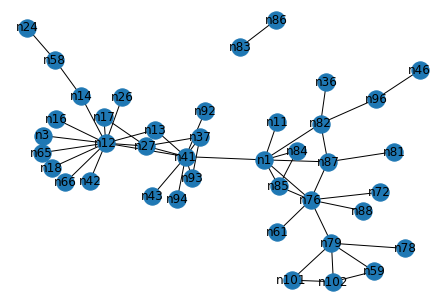

In [743]:
# Plotting graph of phase 11

nx.draw(G[11], pos=nx.drawing.nx_agraph.graphviz_layout(G[11]), with_labels=True) 

The peripheral traffickers on the other hand included the persons with the lowest measure of score from betweenness. These people included Oscar Nieri (17) the handyman of Morales, Roderik Janouska (77), the individual with airport contacts, Richard Brebner (80), the transporter of cocaine from US to Montréal, Ricardo Negrinotti (33), the person handing cocaine in the US to Brebner, Beverly Ashton (106), spouse of Nino, transporter of money and documents, and Steve Cunha (96), the transporter manager and owner of a legitimate import company. All these people had a zero score from betweenness which meant they could have been easily replaced with other people in the network. The last one on the list,
Steve Cunha, eventually became the informer after his arrest. From this we can conclude that for law enforcement it would be beneficial to try to persuade as informants people in the criminal network that have some contact with the rest of the people in the network but who are not perhaps crucial for running the network and its operations. Once caught these
people who are not so well connected also due to less risk taking have more to gain from switching sides compared to the critical members who are more deep in holding accountable for their criminal actions once caught also risk longer jail time. For Steve Cunha the drug traffic was probably only a side-business that generated additional revenues so this was
probably another reason to switch sides.

<b> Now, we will attemp to analyze the overall evolution of the network and correlate the patterns we observe to events that happened during the investigation. The plots below visualizes the criminal network for 2 consecutive phases: Phase x and x+1. Identify x.</b>



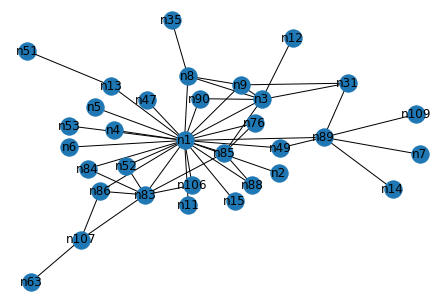

In [744]:
# Plotting graph of phase 4

nx.draw(G[4], pos=nx.drawing.nx_agraph.graphviz_layout(G[4]), with_labels=True) 

The first graph consists of the phase 4, thus x represents number 4.

<b> The change in the network from Phase X to X+1 coincides with a major event that took place during the actual investigation. Identify the event and explain how the change in centrality rankings and visual patterns, observed in the network plots above, relates to said event.</b>

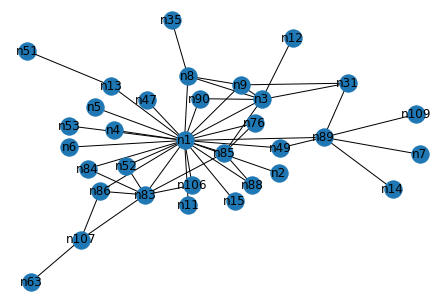

In [745]:
# Plotting graph of phase 4

nx.draw(G[4], pos=nx.drawing.nx_agraph.graphviz_layout(G[4]), with_labels=True) 

After the phase 4 (graph above), the network started to diversify their activities through the traffic of cocaine. This change can be seen in the graph below of phase 5 where Ernesto Morales - number 12 - the principal organizer of the cocaine import first appears as the intermediary between the Columbians and the Serero organization.

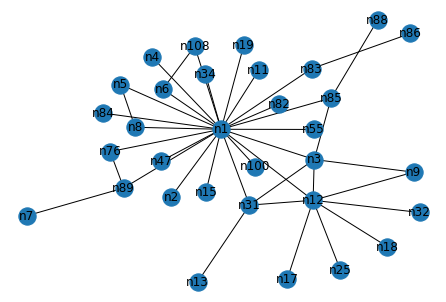

In [746]:
# Plotting graph of phase 5

nx.draw(G[5], pos=nx.drawing.nx_agraph.graphviz_layout(G[5]), with_labels=True) 

This change could be seen from the eigenvector centrality as well as from the betweenness centrality measure. The eigenvector centrality measures went up for some of the members while the betweenness centrality went down. From these measures we can say that the network became more cautious and the organization became less hierarchical compared to what it was before the seizure.

<b> While centrality helps explain the evolution of every player's role individually, we need to explore the global trends and incidents in the story in order to understand the behavior of the criminal enterprise. Describe the coarse pattern(s) you observe as the network evolves through the phases. Does the network evolution reflect the background story?</b>

We can see looking at the graphs that the network was expanding until the first seizure happened in phase 4. At this stage, the network was only caught dealing marijuana, but after this moment, a new key player (12) Ernesto Morales appeared on the graphs to organize the cocaine import. This was also the moment where the network shifted its dealing into hard narcotics. We can see this changed the involvement of some previous key players such as Alain Levy (83) who provided funding for the operations. Looking at the last graph of phase 11, we can see Alain and his brother Gérard being separated from the rest of the network. Perhaps this separation started to happen already once the group started to deal with cocaine from phase 5 onwards. Another key player which arrived after the first seizure was Patrick Lee (87) that appeared for the first time in phase 6 of the graph below.

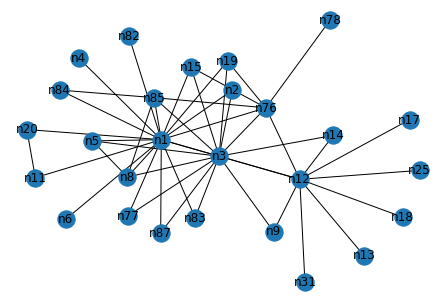

In [747]:
# Plotting graph of phase 6

nx.draw(G[6], pos=nx.drawing.nx_agraph.graphviz_layout(G[6]), with_labels=True) 

Lee provided the funding for the operations from this point onwards and his influence appeared to grow by time as can be seen by comparing the previous graph to the graph below of phase 10.

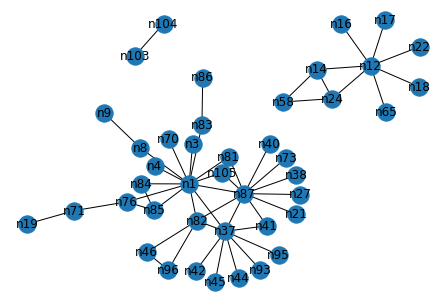

In [748]:
# Plotting graph of phase 10

nx.draw(G[10], pos=nx.drawing.nx_agraph.graphviz_layout(G[10]), with_labels=True) 

From this graph and from the graph of phase 7 below, we can also see that each time there was only a seizure of marijuana, there appeared another smaller network surrounding Ernesto Morales (12). This network increased from 5 people connected to Morales in phase 7 to 8 people connected in phase 10. These graphs show the importance of Ernesto Morales in the network and the growth of his influence through time.

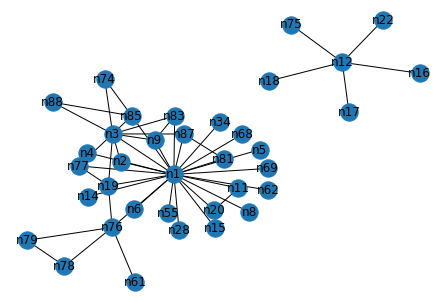

In [749]:
# Plotting graph of phase 7

nx.draw(G[7], pos=nx.drawing.nx_agraph.graphviz_layout(G[7]), with_labels=True)

<b> Are there other actirs that play an important role but are not on the list of investigation (i.e. actors who are not among the 23 listed above)? List them, and explain why they are important.</b>

We can see from the graph above of phase 10 a group of two people, number 103 and 104 being separated completely from the other two main groups. These two people were not present in the other phases and graphs so we are left to wonder what was their part in the story as they were still included in the investigation. However, because they formed their own group at this particular phase where also the largest seizure of 2200 kg of marijuana were confiscated they must have been important to be included in the investigation and for this particular seizure. These two probably made important financial contributions to the network and wanted to stay more discrete from the actual operations.

<b> What are the advantages of looking at the directed version vs. undirected version of the criminal network?</b>

If we would have studied the network from a directed graph we would have gained more information compared to when studying from an undirected one. Moreover, from a directed graph we would have been able to see the nodes and the connections onto a node through the in-degree centrality, and the connections from a node through the out-degree centrality. This is measured through the left-eigenvectors which show the weighted importance of the nodes pointing to a particular node (i.e. the importance of the actors feeding information into a player) and through the right-eigenvectors that the nodes that the particular points to (i.e. the importance of the actors that the player is giving information to).

By looking solely at the eigenvectors we would have probably missed the actual roles and functions of the nodes because with the eigenvectors you can only see the centrality of a node based on the centrality of its neighbors. Thus, you wouldn't be able to see which connections are actually more important than others since the eigenvectors do not take
account of the ‘cascade effects’ where the importance of a node would be captured by where the node is located in relation to the path between other nodes as in with the betweenness centrality. On a criminal network the quality of the connection, who you are associated with, is more important than the quantity of connections you have. Thus, solely comparing the popularity of each node would prove difficult in identifying the actual roles of the different players and their importance in the network.

# Co-offending Network

The data for this problem set consists of individuals who were arrested in Quebec between 2003 and 2010. Some of the individuals have always acted solo, and have been arrested alone throughout their criminal career. Others co-offended with other individuals, and have been arrested in groups. The goal of this problem set is to construct and analyze the co-offender network. The nodes in the network are the offenders, and two offenders share a (possibly weighted) edge whenever they are arrested for the same crime event. 

<b> How many data points, or cases, does this data set have after removing duplicates? </b>

In [750]:
# Loading data

df = pd.read_csv("Cooffending.csv")
df.head()

,OffenderIdentifier,OffenderGender,CrimeIdentifier,CrimeType1,CrimeType2,CrimeType3,CrimeType4,Municipality,CrimeLocation,NumberYouthOffenders,NumberAdultOffenders,CrimeDate,CrimeYear
0,1,F,1085034,3530.0,NaN,NaN,NaN,58227,2.0,0,1,12/17/2005,2005
1,2,F,1431379,1430.0,NaN,NaN,NaN,94068,5.0,0,1,04/23/2008,2008
2,4,M,167174,1430.0,21702.0,NaN,NaN,49058,2.0,0,1,03/06/2008,2008
3,5,M,1179096,1420.0,NaN,NaN,NaN,65005,71.0,0,1,08/21/2008,2008
4,17,M,1270690,1625.0,NaN,NaN,NaN,23027,NaN,0,3,04/30/2003,2003


In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280459 entries, 0 to 1280458
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   OffenderIdentifier    1280459 non-null  int64  
 1   OffenderGender        1280459 non-null  object 
 2   CrimeIdentifier       1280459 non-null  int64  
 3   CrimeType1            1279009 non-null  float64
 4   CrimeType2            150352 non-null   float64
 5   CrimeType3            30052 non-null    float64
 6   CrimeType4            6926 non-null     float64
 7   Municipality          1280459 non-null  int64  
 8   CrimeLocation         1140448 non-null  float64
 9   NumberYouthOffenders  1280459 non-null  int64  
 10  NumberAdultOffenders  1280459 non-null  int64  
 11  CrimeDate             1280459 non-null  object 
 12  CrimeYear             1280459 non-null  int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 127.0+ MB


In [752]:
df[['OffenderIdentifier','CrimeIdentifier']].duplicated().sum()

472

In [753]:
df = df.drop_duplicates(subset=["OffenderIdentifier", "CrimeIdentifier"])
print('Number of cases after removing duplicates:',len(df))

Number of cases after removing duplicates: 1279987


<b> How many unique offenders are there?</b>

In [754]:
print('Number of unique offenders:',len(df.OffenderIdentifier.unique()))

Number of unique offenders: 539593


<b> How many unique crime events are there?</b>

In [755]:
print('Number of unique crime events:', len(df.CrimeIdentifier.unique()))

Number of unique crime events: 1164836


<b> Which year has the most unique crime events?</b>

In [756]:
print('The year which had the most unique crime events was', df.drop_duplicates('CrimeIdentifier').groupby('CrimeYear')['CrimeIdentifier'].count().idxmax())

The year which had the most unique crime events was 2008


<b> How many unique crime events were there in this year?</b>

In [757]:
print('In 2008 there were {} unique crime events'.format(df.drop_duplicates('CrimeIdentifier').groupby('CrimeYear')['CrimeIdentifier'].count().max()))

In 2008 there were 199288 unique crime events


<b> What crime event involved the greatest number of offenders? How many offenders involved? Which municipality was the crime event committed in?</b>

In [758]:
# creating series for the total number of offenders

df['TotalOffenders'] = df['NumberYouthOffenders'] + df['NumberAdultOffenders']

In [759]:
df.drop_duplicates('CrimeIdentifier').sort_values('TotalOffenders', ascending=False)[['CrimeIdentifier','TotalOffenders','Municipality']].head(1)

,CrimeIdentifier,TotalOffenders,Municipality
43313,27849,156,66023


<b> Which offender committed the most crimes?</b>

In [760]:
df['OffenderIdentifier'].value_counts()[:1]

300728    456
Name: OffenderIdentifier, dtype: int64

After this warm-up data exploration, build the co-offender network. You may wish to adjust the offender and crime identifiers to be consecutive integers so as to remove unnecessary nodes.

Given the size of the network, be careful regarding computational and memory constraints. Be sure to use sparse representations of the data whener possible. After creating the sparse cooffending adjacency matrix convert it to a graph.

<b> How many nodes are there in the graph? How many solo offenders are there? How many edges are there?</b>

In [761]:
# Remapping dataframe with unique identifiers in order to drop duplicates

OffenderIdentifier_dict = { OffenderIdentifier: i for i, OffenderIdentifier in enumerate(df.OffenderIdentifier.unique()) }
CrimeIdentifier_dict = { CrimeIdentifier: i for i, CrimeIdentifier in enumerate(df.CrimeIdentifier.unique()) }

In [762]:
# Using map() with dictionaries for remapping 

df.OffenderIdentifier = df.OffenderIdentifier.map(OffenderIdentifier_dict.get)
df.CrimeIdentifier = df.CrimeIdentifier.map(CrimeIdentifier_dict.get)

In [763]:
# Creating sparse matrix with row and col indices that have boolean values

row, col, vals = df.OffenderIdentifier, df.CrimeIdentifier, np.ones(len(df.OffenderIdentifier))
crime_matrix = scipy.sparse.csr_matrix((vals, (row, col)), shape=(row.max() + 1, col.max() + 1))
crime_matrix.shape

(539593, 1164836)

In [764]:
# Creating co-offending matrix

cooffend_matrix = crime_matrix @ crime_matrix.T
cooffend_matrix.shape

(539593, 539593)

In [765]:
# Creating copy for future manipulations

cooffend_matrix_raw = cooffend_matrix.copy()

In [766]:
# Creating co-offending adjacency matrix with binary mapping

cooffend_matrix[cooffend_matrix > 0] = 1 # All the values greater than zero are 1
cooffend_matrix.setdiag(0) # Diagonal elements are zero since edges from a node to itself (self loops) are not allowed
cooffend_matrix.eliminate_zeros() # To avoid self loops since setdiag(0) does not itself change the sparsity pattern
cooffend_matrix.shape

(539593, 539593)

In [767]:
# Creating graph from the adjacency matrix (i.e. a graph to see who is collaborating in the crimes)

G = nx.from_scipy_sparse_matrix(cooffend_matrix) # The graph shows whther pairs of nodes are adjacent or not in the graph

In [768]:
print('There are {} nodes in the graph.'.format(G.number_of_nodes()))

There are 539593 nodes in the graph.


In [769]:
print('There are {} solo offenders in the graph'.format(len(list(nx.isolates(G)))))

There are 418434 solo offenders in the graph


In [770]:
print('There are {} edges in the graph'.format(G.number_of_edges()))

There are 178413 edges in the graph


Now remove all isolated nodes from the graph. Let $G$ be the network with all isolated nodes removed.

<b> What is the mean degree of G? For G, how many nodes have a degree of at least 100? How many connected components does G have? </b>

In [771]:
# Removing all isolated nodes from the graph

G_removed = G.copy()
G_removed.remove_nodes_from(list(nx.isolates(G)))

In [772]:
# Calculating mean degree of graph (i.e. the average connections someone has)

degree_list = sorted([d for n, d in G_removed.degree()], reverse=True)
print("The mean of node degrees is {}".format(np.mean(degree_list)))

The mean of node degrees is 2.945105192350548


In [773]:
# Calculating number of nodes with a degree of at least 100 (i.e. the biggest organized group)

nodes_degree_100 = np.sum(np.array(degree_list) >= 100)
print("The number of nodes with a degree of at least 100 is {}".format(nodes_degree_100))

The number of nodes with a degree of at least 100 is 265


In [774]:
# Calculating connected components (i.e. the greatest number of people connected in a way to each other)

G_components = sorted(nx.connected_components(G_removed), key=len, reverse=True)
print("The number of connected components is {}".format(len(G_components)))

The number of connected components is 36098


<b> Plot the degree distribution (or an approximation of it if needed) of G. Comment on the shape of the distribution. Could this graph come from an Erdos-Renyi model? Why might the degree distribution have this shape?</b>

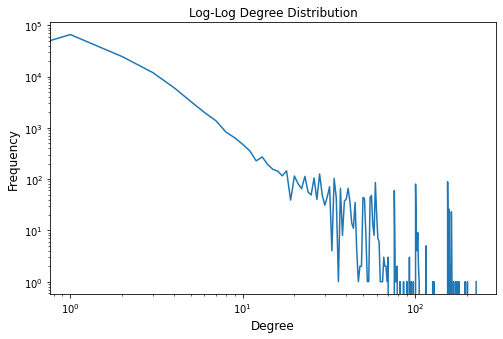

In [775]:
# Plotting degree distribution on a log-log scale

degree_freq = nx.degree_histogram(G_removed)
degrees = range(len(degree_freq))
plt.figure(figsize=(8, 5))
plt.title('Log-Log Degree Distribution')
plt.loglog(degrees, degree_freq) 
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

The plot shows the degree distribution where all the isolated nodes are removed and the logarithm of both x and y axes is taken with the degree distribution (i.e. log-log plot) to help to see that the network is following a power-law which is the case. This means the graph couldn't come from an Erdos-Renyi model. There should have been more edges relative to the nodes for it to come from an Erdos-Renyi model. Here, on the other hand, the edges are concentrated on a small group of co-offenders, as most co-offenders in the database were solo offenders. The shape suggests that that first time offenders seek out more experienced offenders when partnering for crimes and vice-versa.

<b> Now, isolate the largest connected component of G; how many nodes does the largest connected component have?</b>

In [776]:
G_components_largest = G.subgraph(G_components[0]) # Creating a subgraph of the largest components
print('The largest connected component has {} nodes'.format(len(G_components_largest)))

The largest connected component has 19924 nodes


Now we will consider two ways of choosing a subgraph of the original network. 

Consider first the network consisting of all nodes in $G$, but only containing the edges that correspond to pairs of offenders who co-offended together at least twice (that is, they repeatedly co-offend together). Remove all isolated nodes and call $G_ r$ the remaining graph. 

To construct the second, non-repeating co-offending graph (the offenders may commit more than one crime, but never with the same person twice) $G_{nr}$, take only edges in $G$ corresponding to pairs of offenders who only cooffended together exactly once, and remove the resulting isolated nodes. We will examine how these sub-networks differ.

First we will look at some statistics for the overall graphs $G_r$, $G_{nr}$.

<b> How many nodes are there in $G_r$ and $G_{nr}$?</b>

In [777]:
# Creating co-offending adjacency matrix for repeating co-offenders (G_r)

cooffend_matrix_gr = cooffend_matrix_raw.copy()

cooffend_matrix_gr.data[np.where(cooffend_matrix_gr.data<2)[0]]=0 # Check where the values in the rows are less than 2
cooffend_matrix_gr[cooffend_matrix_gr > 1] = 1 # All the values greater than one are 1
cooffend_matrix_gr.setdiag(0)
cooffend_matrix_gr.eliminate_zeros()
cooffend_matrix_gr.shape

(539593, 539593)

In [778]:
# Creating graph from the adjacency matrix

G_r = nx.from_scipy_sparse_matrix(cooffend_matrix_gr)

In [779]:
# Removing all isolated nodes from the graph

G_r.remove_nodes_from(list(nx.isolates(G_r)))

In [780]:
print('There are {} of nodes in the repeating co-offenders graph'.format(G_r.number_of_nodes()))

There are 17764 of nodes in the repeating co-offenders graph


In [781]:
# Creating co-offending adjacency matrix for non-repeating co-offenders (G_nr)

cooffend_matrix_gnr = cooffend_matrix_raw.copy()

cooffend_matrix_gnr[cooffend_matrix_gnr >1] = 0 # All the values greater than one are 0
cooffend_matrix_gnr.setdiag(0)
cooffend_matrix_gnr.eliminate_zeros() 
cooffend_matrix_gnr.shape

(539593, 539593)

In [782]:
# Creating graph from the adjacency matrix

G_nr = nx.from_scipy_sparse_matrix(cooffend_matrix_gnr)

In [783]:
# Removing all isolated nodes from the graph

G_nr.remove_nodes_from(list(nx.isolates(G_nr)))

In [784]:
print('There are {} of nodes in the non-repeating co-offenders graph'.format(G_nr.number_of_nodes()))

There are 113519 of nodes in the non-repeating co-offenders graph


<b> How many edges are there in each?</b>

In [785]:
print('There are {} of edges in the repeating-coffenders graph'.format(G_r.number_of_edges()))

There are 15448 of edges in the repeating-coffenders graph


In [786]:
print('There are {} of edges in the non-repeating-coffenders graph'.format(G_nr.number_of_edges()))

There are 162965 of edges in the non-repeating-coffenders graph


<b> How many connected components are there in the two graphs?</b>

In [787]:
# Calculating connected components in the repeating co-offenders graph

G_r_components = sorted(nx.connected_components(G_r), key=len, reverse=True)
print('There are {} connected components in the repeating co-offenders graph'.format(len(G_r_components)))

There are 6463 connected components in the repeating co-offenders graph


In [788]:
# Calculating connected components in the non-repeating co-offenders graph

G_nr_components = sorted(nx.connected_components(G_nr), key=len, reverse=True)
print('There are {} connected components in the non-repeating co-offenders graph'.format(len(G_nr_components)))

There are 35596 connected components in the non-repeating co-offenders graph


<b> What is the average component size (number of nodes) for each graph?</b>

In [789]:
print('The average component size in the repeating co-offenders graph is', np.mean(list(map(len, (G_r_components)))))

The average component size in the repeating co-offenders graph is 2.7485687761101656


In [790]:
print('The average component size in the non-repeating co-offenders graph is', np.mean(list(map(len, (G_nr_components)))))

The average component size in the non-repeating co-offenders graph is 3.189094280256209


<b> What fraction of nodes are in the largest component of each graph?</b>

In [791]:
# Calculating fraction of nodes in the largest component of the repeating co-offenders graph

G_r_components_largest = G_r.subgraph(G_r_components[0]) # Creating a subgraph of the largest component
fraction_gr = G_r_components_largest.number_of_nodes() / G_r.number_of_nodes()
print('The fraction of nodes in the largest component of the repeating co-offenders graph is', fraction_gr )

The fraction of nodes in the largest component of the repeating co-offenders graph is 0.0037153794190497636


In [792]:
# Calculating fraction of nodes in the largest component of the non-repeating co-offenders graph

G_nr_components_largest = G_nr.subgraph(G_nr_components[0]) # Creating a subgraph of the largest component
fraction_gnr = G_nr_components_largest.number_of_nodes() / G_nr.number_of_nodes()
print('The fraction of nodes in the largest component of the non-repeating co-offenders graph is', fraction_gnr)

The fraction of nodes in the largest component of the non-repeating co-offenders graph is 0.10646675886855944


<b> Compute the edge density of the largest component of each of the three graphs.</b>

In [793]:
print('The density for G, the full graph, is',nx.density(G_components_largest))

The density for G, the full graph, is 0.0003556454848657796


In [794]:
print('The density for G_r, the repeating co-offenders graph, is', nx.density(G_r_components_largest))

The density for G_r, the repeating co-offenders graph, is 0.04568764568764569


In [795]:
print('The density for G_nr, the non-repeating co-offenders graph, is', nx.density(G_nr_components_largest))

The density for G_nr, the non-repeating co-offenders graph, is 0.0007231308979893168


<b> Plot the distribution of clustering coefficients for each node for $G_r$ and $G_nr$. What shape do the plots make? What does this tell you about the behavior of the actors?</b>

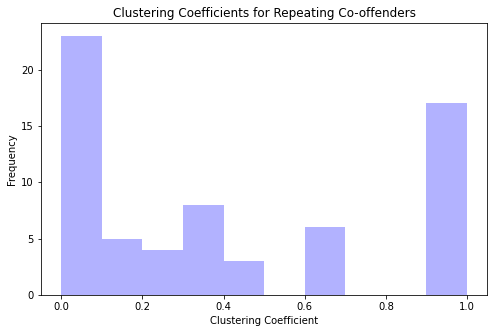

In [796]:
# Plotting the distribution of clustering coefficients for G_r 

G_r_clusters = nx.clustering(G_r_components_largest)

plt.figure(figsize=(8,5))
plt.title('Clustering Coefficients for Repeating Co-offenders')
plt.hist(G_r_clusters.values(), color='blue', alpha=0.3, bins=10)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

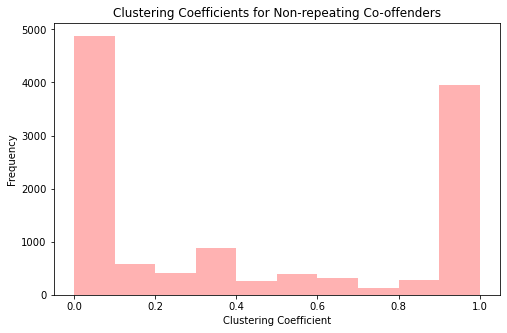

In [797]:
# Plotting the distribution of clustering coefficients for G_nr

G_nr_clusters = nx.clustering(G_nr_components_largest)

plt.figure(figsize=(8,5))
plt.title('Clustering Coefficients for Non-repeating Co-offenders')
plt.hist(G_nr_clusters.values(), color='red', alpha=0.3, bins=10)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

Once we plot the distribution of clustering coefficients for the repeating and the non-repeating co-offenders first we notice a bimodal shape occurring in both. Here, most the crimes are done either by people with only a few connections or by people who are well connected. It seems the majority prefer to act in a smaller group rather than larger, but the ones who do act in groups are very well connected. This is a sign of organized crime.

<b> Pick a centrality measure (degree, eigenvector, betweenness, etc.) and compute the scores for the top (largest) component of $G_r$ and $G_nr$. Compare the distribution of the centrality across nodes (for example, with summary statistics and/or a histogram). Examine the number of crimes committed by the most central actor in the repeat offender graph, does this support your conclusions?</b>

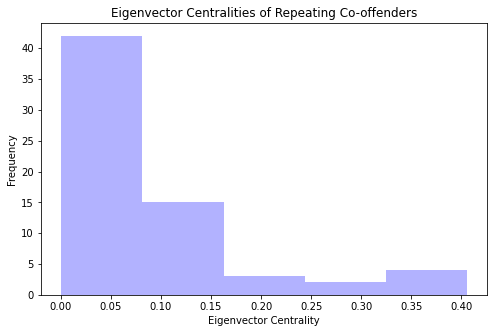

In [798]:
# Plotting the eigenvector centrality measure for the largest component of G_r

G_r_eigenvector_centrality = nx.eigenvector_centrality_numpy(G_r_components_largest)

plt.figure(figsize=(8,5))
plt.title('Eigenvector Centralities of Repeating Co-offenders')
plt.hist(G_r_eigenvector_centrality.values(), color="blue", alpha=0.3, bins=5)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()

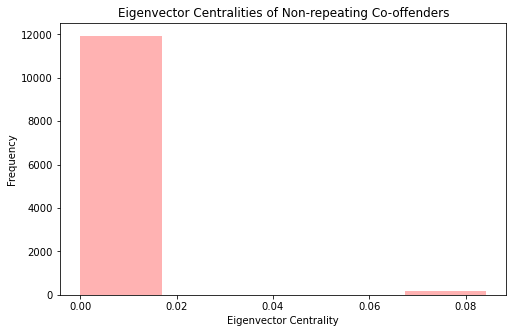

In [799]:
# Plotting the eigenvector centrality measure for the largest component of G_r

G_nr_eigenvector_centrality = nx.eigenvector_centrality_numpy(G_nr_components_largest)

plt.figure(figsize=(8,5))
plt.title('Eigenvector Centralities of Non-repeating Co-offenders')
plt.hist(G_nr_eigenvector_centrality.values(), color='red', alpha=0.3, bins=5)
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.show()

When plotting the distribution for eigenvector centralities we notice that in both of the two groups of co-offenders, in the biggest connected component, the centrality measure is clustered close to zero. While the non-repeating group has also some people evenly distributed in between the two extremes, most of the non-repeating co-offenders are close to zero, which indicates that most of the criminals are not that well connected to the "top" well-connected criminals, but rather do their crimes together perhaps with only one person. 

The criminals on the biggest connect group of repeating co-offenders on the other hand, seem to be better connected inside the group also with the other criminals there. This could indicate an orgnized crime group of sort biker gang or the mob who commit repeatedly crimes inside a bigger groupof people where these people not only know each other pretty well, but have a certain role in perfoming the crime and this is why it is easier to repeat over and over again.